In [62]:
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3920396)

C:\Users\fredd\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [63]:
print(df.player.value_counts())

player
Mohamed Abdel Monem                          201
Hamdi Fathi                                  189
Mohamed Hamdy Sharaf                         188
Ahmed Elsayed Ali Elsayed Hegazy             181
Emam Ashour Metwally Abdelghany              178
Jordan Ayew                                  169
Omar Kamal Abdel Wahed                       163
Gideon Mensah                                158
Salis Abdul Samed                            138
Denis Odoi                                   135
Omar Marmoush                                133
Mohammed Kudus                               132
Mohamed Salisu                               129
Antoine Semenyo                              127
Mohamed Naser Elsayed Elneny                 119
Alexander Djiku                              114
Mostafa Mohamed Ahmed Abdallah               109
Majeed Ashimeru                               90
Mahmoud Ibrahim Hassan                        71
Mostafa Fathi                                 69
Iñaki William

In [64]:
df = df[(df['player'] == 'Gideon Mensah') & (df['type'] == 'Pass')]

In [65]:
df.head()

50_50 ball_receipt_outcome ball_recovery_recovery_failure  \
80    NaN                  NaN                            NaN   
82    NaN                  NaN                            NaN   
106   NaN                  NaN                            NaN   
109   NaN                  NaN                            NaN   
129   NaN                  NaN                            NaN   

    block_deflection carry_end_location clearance_aerial_won  \
80               NaN                NaN                  NaN   
82               NaN                NaN                  NaN   
106              NaN                NaN                  NaN   
109              NaN                NaN                  NaN   
129              NaN                NaN                  NaN   

    clearance_body_part clearance_head clearance_left_foot  \
80                  NaN            NaN                 NaN   
82                  NaN            NaN                 NaN   
106                 NaN            NaN                 NaN   
109                 NaN            NaN                 NaN   
129                 NaN            NaN                 NaN   

    clearance_right_foot  ... shot_technique shot_type substitution_outcome  \
80                   NaN  ...            NaN       NaN                  NaN   
82                   NaN  ...            NaN       NaN                  NaN   
106                  NaN  ...            NaN       NaN                  NaN   
109                  NaN  ...            NaN       NaN                  NaN   
129                  NaN  ...            NaN       NaN                  NaN   

    substitution_replacement tactics   team  team_id     timestamp  type  \
80                       NaN     NaN  Ghana     4885  00:07:00.266  Pass   
82                       NaN     NaN  Ghana     4885  00:07:17.944  Pass   
106                      NaN     NaN  Ghana     4885  00:10:39.962  Pass   
109                      NaN     NaN  Ghana     4885  00:10:45.728  Pass   
129                      NaN     NaN  Ghana     4885  00:12:10.780  Pass   

    under_pressure  
80             NaN  
82             NaN  
106            NaN  
109            NaN  
129            NaN  

[5 rows x 88 columns]

In [66]:
df = df[['location', 'pass_end_location', 'pass_outcome']]

In [67]:
df.head()

location pass_end_location pass_outcome
80    [49.7, 3.3]      [41.6, 17.2]          NaN
82   [64.9, 12.1]      [79.1, 17.2]          NaN
106  [38.4, 16.8]      [50.1, 24.3]          NaN
109   [47.4, 7.5]      [84.4, 34.7]          NaN
129  [48.1, 19.2]      [64.2, 10.1]          NaN

In [68]:
df[['x', 'y']] = df['location'].apply(pd.Series)

In [69]:
df[['end_x', 'end_y']] = df['pass_end_location'].apply(pd.Series)
df['pass_outcome'] = df['pass_outcome'].fillna("Complete")

In [70]:
df['entered_final_third'] = (df['end_x'] >= 80) & (df['x'] < 80)

In [71]:
df.entered_final_third.value_counts()

entered_final_third
False    41
True      8
Name: count, dtype: int64

In [72]:
df = df[df['entered_final_third'] == True]

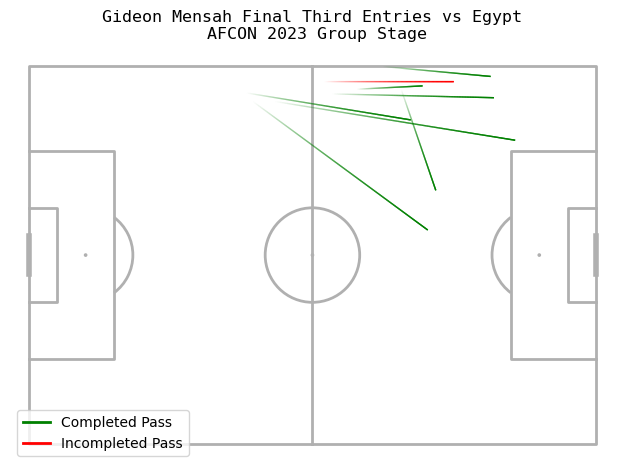

In [78]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb')

fig, ax = pitch.draw()

for x in df.to_dict(orient='records'):
    if x['pass_outcome'] == "Complete":
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=1, 
                   transparent=True, comet=True, ax=ax, color='g')
    else:
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=1, 
                   transparent=True, comet=True, ax=ax, color='r')
        
ax.set_title("Gideon Mensah Final Third Entries vs Egypt\n AFCON 2023 Group Stage",
            fontsize=12, fontfamily="monospace")

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color='g', lw=2, label='Completed Pass'),
    Line2D([0], [0], color='r', lw=2, label='Incompleted Pass')
]

ax.legend(handles=legend_elements, loc='lower left')